In [ ]:
#load dependencies / mount drive

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import pickle
import random
import shutil
import time
import glob
import csv 

from google.colab import drive
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from pathlib import Path

%tensorflow_version 2.x
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')
%cd /content/
%mkdir training

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content


In [ ]:
# CSV VERSION TO LOAD
version = "[v4-0001]-"


# CHANGE THIS TO REFLECT PATH TO "Waymo" Directory

colab_root = "/content/drive/My Drive"
local_csv_loc = "/content/training/"

In [ ]:
# USE PRE-COMPILED IMAGES / CSV

# UNCOMMENT TO RUN

%cd /content/
%cp "/content/drive/My Drive/Waymo/training.zip" training.zip            # THE ZIP FILE IS IN THE WAYMO SHARED FOLDER AS training.zip
!unzip -q training.zip                                                   # unzip contents of training.zip to /content/training

/content/drive/My Drive/Waymo/training
cp: cannot create regular file 'training.zip': Read-only file system
unzip:  cannot find or open training.zip, training.zip.zip or training.zip.ZIP.


### Next Cell is to copy all CSV files from Drive to Local Instance
### DO NOT RUN THIS IF YOU ARE USING THE CELL ABOVE FOR PRE-EXTRACTED DATA

In [ ]:
#COPY ALL csv files to local runtime

%cd {colab_root}/Waymo/training/
folders = glob.glob("*")
folders.sort()

fold_count = 1

img_list = set()

# Iterate through folders
for folder in folders:
  %cd {folder}
  
  # grab correct version of csv file from cell 2
  folder = version+folder

  print('|--- + ' + str(folder) + " -{ " + str(fold_count) + " of " + str(len(folders)) + " }-")
  
  %cp {folder}.csv {local_csv_loc}{folder}.csv

  fold_count+= 1
  
  %cd {colab_root}/Waymo/training/ 
  
  # Change fold_count to however many CSV (TAR) Files to use.
  # if fold_count == 4:
  #   break

/content/drive/My Drive/Waymo/training
/content/drive/My Drive/Waymo/training/training_0000
|--- + [v4-0001]-training_0000 -{ 1 of 32 }-
/content/drive/My Drive/Waymo/training
/content/drive/My Drive/Waymo/training/training_0001
|--- + [v4-0001]-training_0001 -{ 2 of 32 }-
/content/drive/My Drive/Waymo/training
/content/drive/My Drive/Waymo/training/training_0002
|--- + [v4-0001]-training_0002 -{ 3 of 32 }-
/content/drive/My Drive/Waymo/training
/content/drive/My Drive/Waymo/training/training_0003
|--- + [v4-0001]-training_0003 -{ 4 of 32 }-
/content/drive/My Drive/Waymo/training
/content/drive/My Drive/Waymo/training/training_0004
|--- + [v4-0001]-training_0004 -{ 5 of 32 }-
/content/drive/My Drive/Waymo/training
/content/drive/My Drive/Waymo/training/training_0005
|--- + [v4-0001]-training_0005 -{ 6 of 32 }-
/content/drive/My Drive/Waymo/training
/content/drive/My Drive/Waymo/training/training_0006
|--- + [v4-0001]-training_0006 -{ 7 of 32 }-
/content/drive/My Drive/Waymo/training
/c

### PROCESS CSV FILE ONLY to create all_data variable used for train_test splits

In [ ]:
# READ ALL CSV FILES AND CORRECT IMAGE LOCATION

all_csv_files = glob.glob(os.path.join(local_csv_loc,"*.csv"))

all_csv_files.sort()

np_array_list = []
for file_ in all_csv_files:
    df = pd.read_csv(file_,index_col=None, header=0)
    np_array_list.append(df.to_numpy())

comb_np_array = np.vstack(np_array_list)

all_data = pd.DataFrame(comb_np_array)

# Correct location of image based on local runtime & Data Extraction screwups
all_data[29] = all_data[29].apply(lambda x: str(colab_root) + str(x))
all_data[29] = all_data[29].apply(lambda x: x.replace('labels.tfrecord/','labels/'))

all_data.columns = ['frame-num', 'pose-timestamp', 'f_cam-obj-dist-ped', 'f_cam-obj-dist-cyc', 'f_cam-obj-dist-veh', 'f_cam-obj-dist-sig', 
                    'fl_cam-obj-dist-ped', 'fl_cam-obj-dist-cyc', 'fl_cam-obj-dist-veh', 'fl_cam-obj-dist-sig', 
                    'fr_cam-obj-dist-ped', 'fr_cam-obj-dist-cyc', 'fr_cam-obj-dist-veh', 'fr_cam-obj-dist-sig', 
                    'accel_x', 'accel_y', 'accel_z', 'v_x', 'v_y' , 'v_z', 'w_x','w_y','w_z', 
                    'lag_vx', 'lag_vy', 'lag_vz', 'lag_accel_x', 'lag_accel_y', 'lag_accel_z', 'path']







# Set Column Names
#big_frame.columns = ["col1","col2"....]

# cleanup
del(comb_np_array)
del(np_array_list)

# Show data

all_data

,frame-num,pose-timestamp,f_cam-obj-dist-ped,f_cam-obj-dist-cyc,f_cam-obj-dist-veh,f_cam-obj-dist-sig,fl_cam-obj-dist-ped,fl_cam-obj-dist-cyc,fl_cam-obj-dist-veh,fl_cam-obj-dist-sig,fr_cam-obj-dist-ped,fr_cam-obj-dist-cyc,fr_cam-obj-dist-veh,fr_cam-obj-dist-sig,accel_x,accel_y,accel_z,v_x,v_y,v_z,w_x,w_y,w_z,lag_vx,lag_vy,lag_vz,lag_accel_x,lag_accel_y,lag_accel_z,path
0,1,1.51166e+09,-1,-1,0.686762,0.597874,-1,-1,0.68632,0.59698,-1,-1,0.687003,0.59875,-3.17279,0.32874,0.568134,-0.0794682,-0.00898567,0.0726383,0.0165402,0.0504665,0.00213652,0.237812,-0.0418599,0.0158245,0,0,0,/content/drive/My Drive/Waymo/training/trainin...
1,2,1.51166e+09,-1,-1,0.686756,0.597882,-1,-1,0.686314,0.596988,-1,-1,0.686997,0.598758,-0.91684,0.375583,-0.396345,-0.171153,0.0285728,0.0330036,-0.00912002,0.0203242,0.00450624,-0.0794682,-0.00898567,0.0726383,-3.17279,0.32874,0.568134,/content/drive/My Drive/Waymo/training/trainin...
2,3,1.51166e+09,-1,-1,0.686733,0.597893,-1,-1,0.686291,0.596999,-1,-1,0.686974,0.598768,1.42116,-0.188135,-1.13001,-0.0290362,0.00975918,-0.079998,-0.013404,-0.0547361,-0.00320912,-0.171153,0.0285728,0.0330036,-0.91684,0.375583,-0.396345,/content/drive/My Drive/Waymo/training/trainin...
3,4,1.51166e+09,-1,-1,0.686719,0.597904,-1,-1,0.686276,0.597009,-1,-1,0.68696,0.598778,0.816499,-0.250213,-0.0414343,0.0526131,-0.0152619,-0.0841414,-0.0113267,-0.0573463,-0.00356794,-0.0290362,0.00975918,-0.079998,1.42116,-0.188135,-1.13001,/content/drive/My Drive/Waymo/training/trainin...
4,5,1.51166e+09,-1,-1,0.686696,0.597851,-1,-1,0.686254,0.596956,-1,-1,0.686938,0.598726,-0.756806,0.236532,0.996184,-0.0230651,0.00839055,0.0154738,-0.00794468,0.00929414,5.9695e-05,0.0526131,-0.0152619,-0.0841414,0.816499,-0.250213,-0.0414343,/content/drive/My Drive/Waymo/training/trainin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66454,108,1.50713e+09,0.40513,-1,0.373706,0.507745,0.405103,-1,0.372728,0.50792,0.405109,-1,0.37346,0.507659,0.220863,-0.0988849,-0.0379876,-5.29414,4.03099,-0.0337654,0.0187669,0.0120172,-0.0127253,-5.31623,4.04088,-0.0299665,0.257723,-0.147095,0.1487,/content/drive/My Drive/Waymo/training/trainin...
66455,109,1.50713e+09,0.405265,-1,0.408272,0.445066,0.405251,-1,0.407521,0.445447,0.40525,-1,0.407889,0.444855,0.221601,-0.104473,-0.174176,-5.27198,4.02054,-0.0511833,0.0105199,0.00371761,-0.00789598,-5.29414,4.03099,-0.0337654,0.220863,-0.0988849,-0.0379876,/content/drive/My Drive/Waymo/training/trainin...
66456,110,1.50713e+09,0.405291,-1,0.414416,0.507343,0.40529,-1,0.413666,0.507534,0.405278,-1,0.414072,0.50725,0.129306,-0.0296492,-0.144632,-5.25905,4.01758,-0.0656467,-0.00270076,-0.0115416,-0.000441346,-5.27198,4.02054,-0.0511833,0.221601,-0.104473,-0.174176,/content/drive/My Drive/Waymo/training/trainin...
66457,111,1.50713e+09,0.405228,-1,0.391774,0.507117,0.405239,-1,0.390804,0.507317,0.405214,-1,0.391625,0.507021,0.169369,-0.107534,0.0721754,-5.24212,4.00682,-0.0584291,0.0011525,-0.0126096,-0.0147217,-5.25905,4.01758,-0.0656467,0.129306,-0.0296492,-0.144632,/content/drive/My Drive/Waymo/training/trainin...


In [ ]:
# save all data in drive for safety
all_data.to_csv("/content/drive/My Drive/Waymo/all_data.csv", index=False)

In [ ]:
#read all data from drive in case of restart
all_data = pd.read_csv("/content/drive/My Drive/Waymo/all_data.csv")
#all_data = all_data.iloc[:,1:]

In [ ]:
# CREATE TRAIN VAL TEST SETS

split_1, test_set = train_test_split(all_data, test_size=0.22, shuffle=False)

train_set, val_set = train_test_split(split_1, test_size=0.2, shuffle=False) 

#del(all_data)

del(split_1)

print("Length of train, val, test sets: ", len(train_set), len(val_set), len(test_set))

Length of train, val, test sets:  41470 10368 14621


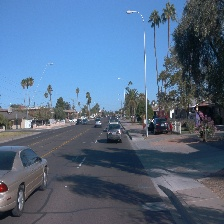

Path: /content/drive/My Drive/Waymo/training/training_0008/segment-14561791273891593514_2558_030_2578_030_with_camera_labels/segment-14561791273891593514_2558_030_2578_030_with_camera_labels.tfrecord--79.jpg


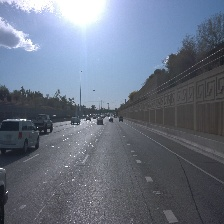

Path: /content/drive/My Drive/Waymo/training/training_0001/segment-10770759614217273359_1465_000_1485_000_with_camera_labels/segment-10770759614217273359_1465_000_1485_000_with_camera_labels.tfrecord--196.jpg


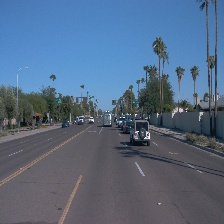

Path: /content/drive/My Drive/Waymo/training/training_0006/segment-1352150727715827110_3710_250_3730_250_with_camera_labels/segment-1352150727715827110_3710_250_3730_250_with_camera_labels.tfrecord--186.jpg
Length of TRAIN set: 44991


In [ ]:
#check TRAIN set
import IPython.display as display

for n in range(3):
  x = train_set.sample(axis=0)
  image_path = x.iloc[0,29]
  display.display(display.Image(image_path))
  print("Path: " + str(x.iloc[0,29]))
print("Length of TRAIN set: " + str(len(train_set)))

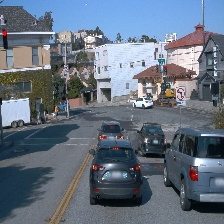

Path: /content/drive/My Drive/Waymo/training/training_0010/segment-15550613280008674010_1780_000_1800_000_with_camera_labels/segment-15550613280008674010_1780_000_1800_000_with_camera_labels.tfrecord--173.jpg


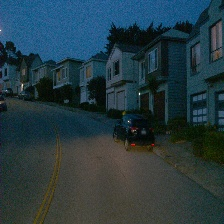

Path: /content/drive/My Drive/Waymo/training/training_0008/segment-14734824171146590110_880_000_900_000_with_camera_labels/segment-14734824171146590110_880_000_900_000_with_camera_labels.tfrecord--7.jpg


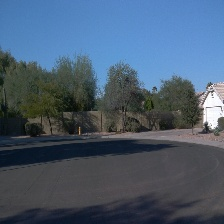

Path: /content/drive/My Drive/Waymo/training/training_0008/segment-14388269713149187289_1994_280_2014_280_with_camera_labels/segment-14388269713149187289_1994_280_2014_280_with_camera_labels.tfrecord--36.jpg
Length of VAL set: 9969


In [ ]:
#check VAL set
import IPython.display as display

for n in range(3):
  x = val_set.sample(axis=0)
  image_path = x.iloc[0,29]
  display.display(display.Image(image_path))
  print("Path: " + str(x.iloc[0,29]))
print("Length of VAL set: " + str(len(val_set)))

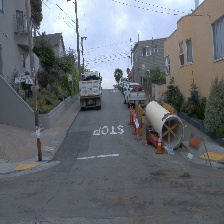

Path: /content/drive/My Drive/Waymo/training/training_0013/segment-17330200445788773877_2700_000_2720_000_with_camera_labels/segment-17330200445788773877_2700_000_2720_000_with_camera_labels.tfrecord--32.jpg


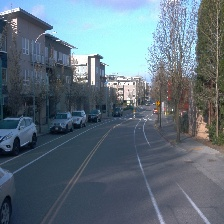

Path: /content/drive/My Drive/Waymo/training/training_0016/segment-1887497421568128425_94_000_114_000_with_camera_labels/segment-1887497421568128425_94_000_114_000_with_camera_labels.tfrecord--164.jpg


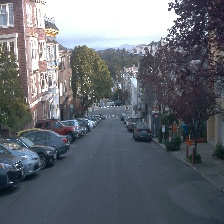

Path: /content/drive/My Drive/Waymo/training/training_0013/segment-1737018592744049492_1960_000_1980_000_with_camera_labels/segment-1737018592744049492_1960_000_1980_000_with_camera_labels.tfrecord--71.jpg
Length of TEST set: 14621


In [ ]:
#check TEST set
import IPython.display as display

for n in range(3):
  x = test_set.sample(axis=0)
  image_path = x.iloc[0,29]
  display.display(display.Image(image_path))
  print("Path: " + str(x.iloc[0,29]))
print("Length of TEST set: " + str(len(test_set)))

# BEGIN FINALIZING TRAIN VAL AND TEST DATASETS

In [ ]:
from sklearn.preprocessing import StandardScaler

       frame-num  pose-timestamp  f_cam-obj-dist-ped  f_cam-obj-dist-cyc  \
34086         10    1.559322e+09            0.410248                -1.0   

       f_cam-obj-dist-veh  f_cam-obj-dist-sig  fl_cam-obj-dist-ped  \
34086            0.489956            0.504625             0.409014   

       fl_cam-obj-dist-cyc  fl_cam-obj-dist-veh  fl_cam-obj-dist-sig  \
34086                 -1.0             0.489414             0.505103   

       fr_cam-obj-dist-ped  fr_cam-obj-dist-cyc  ...  v_y  v_z       w_x  \
34086             0.410849                 -1.0  ...  0.0  0.0  0.000226   

            w_y       w_z  lag_vx  lag_vy  lag_vz  lag_accel_x  lag_accel_y  \
34086  0.000321  0.004421     0.0     0.0     0.0          0.0          0.0   

       lag_accel_z                                               path  
34086          0.0  /content/drive/My Drive/Waymo/training/trainin...  

[1 rows x 30 columns]
Length of input, output, img_path, img_activations :  41470 41470 41470 41470


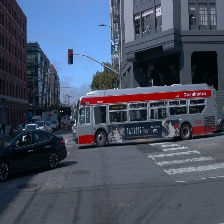

Input : (1.4900124768533085, 0.4102481670207145, -1.0, 0.4899555645837499, 0.5046251281685804, 0.4090137374432677, -1.0, 0.4894136488549884, 0.5051034239267919, 0.41084938160219775, -1.0, 0.4902369482734775, 0.5040072715313508, 0.0498841074938008, -0.0038198501745526, 0.03312629619042305, 0.026300186266973734, 0.02065904164345139, 0.031556437946697526, 0.049477256502920244, -0.0036730672188801817, 0.033209932488132386) Output : (0.0, 0.0) IMG Path : /content/drive/My Drive/Waymo/training/training_0006/segment-1382515516588059826_780_000_800_000_with_camera_labels/segment-1382515516588059826_780_000_800_000_with_camera_labels.tfrecord--10.jpg IMG ACT : /content/training/training_0006/segment-1382515516588059826_780_000_800_000_with_camera_labels/segment-1382515516588059826_780_000_800_000_with_camera_labels.tfrecord--10.jpg


In [ ]:
# Set Up Train Dataset after scaling remaining columns

i = random.randint(0,len(train_set)-1)
pd.options.display.max_columns = 25

print(train_set.loc[[i]])

train_output = train_set[['accel_x' , 'accel_y']]
train_set = train_set.drop(['accel_x' , 'accel_y', 'accel_z', 'lag_accel_x', 'lag_accel_y', 'lag_accel_z'], axis = 1)

train_out = [] 
train_input = []
train_images_act = []
train_images_img = []

train_scaled_features = train_set.copy()

col_names = ['pose-timestamp','v_x','v_y','v_z','w_x','w_y','w_z','lag_vx','lag_vy','lag_vz'] # columns to scale
features = train_scaled_features[col_names]
scaler = StandardScaler().fit(features.values) # use this scaler for test and val as well
features = scaler.transform(features.values)
train_scaled_features[col_names] = features

for x in train_scaled_features.itertuples():
  train_input.append(x[2:24])
  train_images_img.append(x[24])
  train_images_act.append(x[24].replace('/content/drive/My Drive/Waymo/training/', '/content/training/'))

for x in train_output.itertuples():
  train_out.append(x[1:3])

print("Length of input, output, img_path, img_activations : ", len(train_input), len(train_out), len(train_images_act), len(train_images_img))

#SANITY CHECK

image_path = train_images_img[i]
display.display(display.Image(image_path))

print("Input : " + str(train_input[i]) + 
      " Output : " + str(train_out[i]) +
      " IMG Path : " + str(train_images_img[i]) +
      " IMG ACT : " + str(train_images_act[i]))


Length of input, output, img_path, img_activations :  10368 10368 10368 10368


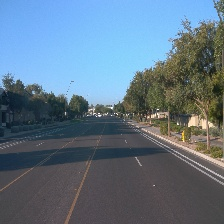

Input : (-0.9000461706929898, -1.0, -1.0, 0.5112325425960711, -1.0, -1.0, -1.0, 0.5110339988807087, -1.0, -1.0, -1.0, 0.5120142863545043, -1.0, -1.8008428777481646, -1.2453834353575453, 0.4882365812167811, 1.0188545168680216, -0.14830129942073852, -0.035509793308847896, -1.798046496904252, -1.2399273316470694, 0.5760976118261465) Output : (-0.5874302608363932, -0.5711410996137524) IMG Path : /content/drive/My Drive/Waymo/training/training_0008/segment-14619874262915043759_2801_090_2821_090_with_camera_labels/segment-14619874262915043759_2801_090_2821_090_with_camera_labels.tfrecord--65.jpg IMG ACT : /content/training/training_0008/segment-14619874262915043759_2801_090_2821_090_with_camera_labels/segment-14619874262915043759_2801_090_2821_090_with_camera_labels.tfrecord--65.jpg


In [ ]:
# Set Up VAL Dataset

val_output = val_set[['accel_x' , 'accel_y']]
val_set = val_set.drop(['accel_x' , 'accel_y', 'accel_z', 'lag_accel_x', 'lag_accel_y', 'lag_accel_z'], axis = 1)

val_out = []
val_input = []
val_images_act = []
val_images_img = []

val_scaled_features = val_set.copy()
features = val_scaled_features[col_names]
features = scaler.transform(features.values)
val_scaled_features[col_names] = features


for x in val_scaled_features.itertuples():
  val_input.append(x[2:24])
  val_images_img.append(x[24])
  val_images_act.append(x[24].replace('/content/drive/My Drive/Waymo/training/', '/content/training/'))

for x in val_output.itertuples():
  val_out.append(x[1:3])

print("Length of input, output, img_path, img_activations : ", len(val_input), len(val_out), len(val_images_act), len(val_images_img))

#SANITY CHECK

i = random.randint(0,len(val_input)-1)

image_path = val_images_img[i]
display.display(display.Image(image_path))

print("Input : " + str(val_input[i]) + 
      " Output : " + str(val_out[i]) +
      " IMG Path : " + str(val_images_img[i]) +
      " IMG ACT : " + str(val_images_act[i]))

Length of input, output, img_path, img_activations :  14621 14621 14621 14621


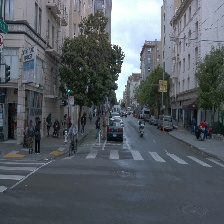

Input : (1.417965419947409, 0.3245737390666374, 0.511163944711916, 0.5109078431867495, 0.4905822639002031, 0.3262397404845733, 0.5116716707076195, 0.5112187220693907, 0.4905921451833205, 0.3238725109127856, 0.5116346078118901, 0.5107340995473573, 0.4910911741893902, -0.13032570346952552, -0.04189029444978977, 0.09768965586780813, -0.357830972415946, -0.09588201817846094, 0.09650899543508747, -0.1350290929742188, -0.04342739180639493, 0.13120423877527537) Output : (0.29857519902152224, 0.10975032604004988) IMG Path : /content/drive/My Drive/Waymo/training/training_0013/segment-16951470340360921766_2840_000_2860_000_with_camera_labels/segment-16951470340360921766_2840_000_2860_000_with_camera_labels.tfrecord--156.jpg IMG ACT : /content/training/training_0013/segment-16951470340360921766_2840_000_2860_000_with_camera_labels/segment-16951470340360921766_2840_000_2860_000_with_camera_labels.tfrecord--156.jpg


In [ ]:
# Set Up test Dataset

test_output = test_set[['accel_x' , 'accel_y']]
test_set = test_set.drop(['accel_x' , 'accel_y', 'accel_z', 'lag_accel_x', 'lag_accel_y', 'lag_accel_z'], axis = 1)

test_out = []
test_input = []
test_images_act = []
test_images_img = []

test_scaled_features = test_set.copy()
features = test_scaled_features[col_names]
features = scaler.transform(features.values)
test_scaled_features[col_names] = features


for x in test_scaled_features.itertuples():
  test_input.append(x[2:24])
  test_images_img.append(x[24])
  test_images_act.append(x[24].replace('/content/drive/My Drive/Waymo/training/', '/content/training/'))

for x in test_output.itertuples():
  test_out.append(x[1:3])

print("Length of input, output, img_path, img_activations : ", len(test_input), len(test_out), len(test_images_act), len(test_images_img))

#SANITY CHECK

i = random.randint(0,len(test_input)-1)

image_path = test_images_img[i]
display.display(display.Image(image_path))

print("Input : " + str(test_input[i]) + 
      " Output : " + str(test_out[i]) +
      " IMG Path : " + str(test_images_img[i]) +
      " IMG ACT : " + str(test_images_act[i]))

In [ ]:
# MEMORY CLEANUP

del(test_output)
del(val_output)
del(train_output)
#del(test_set)

### NEW MODEL - Sequential Single Input and LSTM model

Train and validation data generator

In [ ]:
# training generator ( return feature input and output) 
batch_size= 32
def training_generator(batch_size=64):
  train_i = []
  train_o = []
  train_img = []
  while True:
    for j in range(len(train_input)):
      train_i.append(train_input[j])
      train_o.append(train_out[j])
      if len(train_i) % batch_size == 0:
        features = np.array(train_i).shape[-1]
        #print(np.array(train_i).reshape(batch_size,1,features).shape, np.array(train_o).shape)
        yield((np.array(train_i).reshape(batch_size,1,features), np.array(train_o)))
        train_i = []
        train_o = []
        train_img = []

train_gen = training_generator(batch_size=batch_size)

In [ ]:
# validation generator
def validation_generator(batch_size=64):
  val_i = []
  val_o = []
  while True:
    for j in range(len(val_input)):
      val_i.append(val_input[j])
      val_o.append(val_out[j])
      if len(val_i) % batch_size == 0:
        features = np.array(val_i).shape[-1]
        #print(np.array(train_i).reshape(batch_size,1,22).shape, np.array(train_o).shape)
        yield((np.array(val_i).reshape(batch_size,1,features), np.array(val_o)))
        val_i = []
        val_o = []

val_gen = validation_generator(batch_size=batch_size)

In [ ]:
# test generator 
def test_generator(batch_size=64):
  test_i = []
  test_o = []
  while True:
    for j in range(len(test_input)):
      test_i.append(test_input[j])
      test_o.append(test_out[j])
      if len(test_i) % batch_size == 0:
        features = np.array(test_i).shape[-1]
        #print(np.array(train_i).reshape(1,batch_size,22).shape, np.array(train_o).shape)
        yield((np.array(test_i).reshape(batch_size,1,features), np.array(test_o)))
        test_i = []
        test_o = []

test_gen = test_generator(batch_size=batch_size)

Model 1 
without scaling columns

In [ ]:
model1 = Sequential()
model1.add(LSTM(128))
model1.add(Dropout(0.2))
model1.add(Dense(2))

opt = optimizers.Adam(lr = 0.000005)

model2.compile(loss='mean_absolute_error',
              optimizer=opt,
              metrics=['accuracy'])

from tensorflow.keras.callbacks import TensorBoard
epochs = 243
batch_size = 32
steps_train =len(train_input)//batch_size
steps_val =  len(val_input)//batch_size
LOG_DIR = '/content/'

tbCallBack = TensorBoard(log_dir=LOG_DIR, 
                         histogram_freq=1,
                         write_graph=True,
                         write_images=True)


history = model1.fit(train_gen, epochs=epochs, steps_per_epoch=steps_train, verbose=1, validation_data=val_gen, validation_steps=steps_val)


Epoch 1/243
1295/1295 [==============================] - 10s 7ms/step - loss: 0.4493 - accuracy: 0.4831 - val_loss: 0.3977 - val_accuracy: 0.4705
Epoch 2/243
1295/1295 [==============================] - 9s 7ms/step - loss: 0.4235 - accuracy: 0.5134 - val_loss: 0.3856 - val_accuracy: 0.5401
Epoch 3/243
1295/1295 [==============================] - 9s 7ms/step - loss: 0.4169 - accuracy: 0.5109 - val_loss: 0.3810 - val_accuracy: 0.5534
Epoch 4/243
1295/1295 [==============================] - 9s 7ms/step - loss: 0.4134 - accuracy: 0.5126 - val_loss: 0.3801 - val_accuracy: 0.5777
Epoch 5/243
1295/1295 [==============================] - 9s 7ms/step - loss: 0.4113 - accuracy: 0.5207 - val_loss: 0.3779 - val_accuracy: 0.5725
Epoch 6/243
1295/1295 [==============================] - 9s 7ms/step - loss: 0.4116 - accuracy: 0.5159 - val_loss: 0.3776 - val_accuracy: 0.5806
Epoch 7/243
1295/1295 [==============================] - 9s 7ms/step - loss: 0.4118 - accuracy: 0.5316 - val_loss: 0.3771 - val_a

In [ ]:
steps = len(test_input)//batch_size
score = model1.evaluate(test_gen, steps = steps, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

456/456 [==============================] - 2s 3ms/step - loss: 0.3284 - accuracy: 0.6313
Test loss: 0.3283816874027252
Test accuracy: 0.6313048005104065


Model:

LSTM 128 units and other default settings

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, Flatten, Input, LSTM, Dropout, Bidirectional
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import optimizers

batch_size = 32

model = Sequential()
model.add(LSTM(128, return_sequences= False))
model.add(Dropout(0.2))
model.add(Dense(2))

opt = optimizers.Adam()

model.compile(loss='mean_absolute_error',
              optimizer=opt,
              metrics=['accuracy'])


from tensorflow.keras.callbacks import TensorBoard
epochs = 60
batch_size = 32
steps_train =len(train_input)//batch_size
steps_val =  len(val_input)//batch_size
LOG_DIR = '/content/'

tbCallBack = TensorBoard(log_dir=LOG_DIR, 
                         histogram_freq=1,
                         write_graph=True,
                         write_images=True)


history = model.fit(train_gen, epochs=epochs, steps_per_epoch=steps_train, verbose=1, validation_data=val_gen, validation_steps=steps_val)


Epoch 1/60
1295/1295 [==============================] - 7s 5ms/step - loss: 0.3846 - accuracy: 0.5185 - val_loss: 0.3715 - val_accuracy: 0.5860
Epoch 2/60
1295/1295 [==============================] - 7s 5ms/step - loss: 0.3803 - accuracy: 0.5330 - val_loss: 0.3693 - val_accuracy: 0.5926
Epoch 3/60
1295/1295 [==============================] - 7s 5ms/step - loss: 0.3770 - accuracy: 0.5386 - val_loss: 0.3702 - val_accuracy: 0.4327
Epoch 4/60
1295/1295 [==============================] - 7s 5ms/step - loss: 0.3661 - accuracy: 0.5460 - val_loss: 0.3551 - val_accuracy: 0.4510
Epoch 5/60
1295/1295 [==============================] - 7s 5ms/step - loss: 0.3491 - accuracy: 0.5663 - val_loss: 0.3363 - val_accuracy: 0.6361
Epoch 6/60
1295/1295 [==============================] - 7s 5ms/step - loss: 0.3384 - accuracy: 0.5622 - val_loss: 0.3327 - val_accuracy: 0.4770
Epoch 7/60
1295/1295 [==============================] - 7s 5ms/step - loss: 0.3331 - accuracy: 0.5837 - val_loss: 0.3273 - val_accuracy:

In [ ]:
steps = len(test_input)//batch_size + 1
prediction = model.predict(test_gen, steps = steps, verbose=1)

MAE_x = np.mean(abs(prediction[:14621,0] - np.array(test_out)[:,0]))
MAE_y = np.mean(abs(prediction[:14621,1] - np.array(test_out)[:,1]))

print(MAE_x)
print(MAE_y)

457/457 [==============================] - 1s 2ms/step
0.3258797154451233
0.30691261658991154


In [ ]:
steps = len(test_input)//batch_size
score = model.evaluate(test_gen, steps = steps, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

456/456 [==============================] - 1s 3ms/step - loss: 0.3253 - accuracy: 0.5045
Test loss: 0.3252541124820709
Test accuracy: 0.504454493522644


Model 2: after scaling the columns

Increase the epochs and change learning rate

lstm units 128,
adam lr = 0.00005,
epochs 100

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, Flatten, Input, LSTM, Dropout, Bidirectional
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import optimizers

batch_size = 32

model2 = Sequential()
model2.add(LSTM(128, return_sequences= False))
model2.add(Dropout(0.2))
model2.add(Dense(2))

opt = optimizers.Adam(lr = 0.00005)

model2.compile(loss='mean_absolute_error',
              optimizer=opt,
              metrics=['accuracy'])


from tensorflow.keras.callbacks import TensorBoard
epochs = 100
batch_size = 32
steps_train =len(train_input)//batch_size
steps_val =  len(val_input)//batch_size
LOG_DIR = '/content/'

tbCallBack = TensorBoard(log_dir=LOG_DIR, 
                         histogram_freq=1,
                         write_graph=True,
                         write_images=True)


history = model2.fit(train_gen, epochs=epochs, steps_per_epoch=steps_train, verbose=1, validation_data=val_gen, validation_steps=steps_val)


Epoch 1/100
1295/1295 [==============================] - 7s 6ms/step - loss: 0.3928 - accuracy: 0.4772 - val_loss: 0.3742 - val_accuracy: 0.5423
Epoch 2/100
1295/1295 [==============================] - 7s 5ms/step - loss: 0.3860 - accuracy: 0.5045 - val_loss: 0.3738 - val_accuracy: 0.5010
Epoch 3/100
1295/1295 [==============================] - 7s 5ms/step - loss: 0.3848 - accuracy: 0.5167 - val_loss: 0.3736 - val_accuracy: 0.5233
Epoch 4/100
1295/1295 [==============================] - 7s 5ms/step - loss: 0.3839 - accuracy: 0.5239 - val_loss: 0.3735 - val_accuracy: 0.4702
Epoch 5/100
1295/1295 [==============================] - 7s 5ms/step - loss: 0.3830 - accuracy: 0.5276 - val_loss: 0.3731 - val_accuracy: 0.5171
Epoch 6/100
1295/1295 [==============================] - 7s 5ms/step - loss: 0.3820 - accuracy: 0.5302 - val_loss: 0.3728 - val_accuracy: 0.5421
Epoch 7/100
1295/1295 [==============================] - 7s 5ms/step - loss: 0.3811 - accuracy: 0.5328 - val_loss: 0.3726 - val_ac

In [ ]:
# test generator 
def test_generator(batch_size=64):
  test_i = []
  test_o = []
  while True:
    for j in range(len(test_input)):
      test_i.append(test_input[j])
      test_o.append(test_out[j])
      if len(test_i) % batch_size == 0:
        features = np.array(test_i).shape[-1]
        #print(np.array(train_i).reshape(1,batch_size,22).shape, np.array(train_o).shape)
        yield((np.array(test_i).reshape(batch_size,1,features), np.array(test_o)))
        test_i = []
        test_o = []

test_gen = test_generator(batch_size=batch_size)

In [ ]:
steps = len(test_input)//batch_size + 1
prediction = model2.predict(test_gen, steps = steps, verbose=1)

MAE_x = np.mean(abs(prediction[:14621,0] - np.array(test_out)[:,0]))
MAE_y = np.mean(abs(prediction[:14621,1] - np.array(test_out)[:,1]))

print(MAE_x)
print(MAE_y)

457/457 [==============================] - 1s 2ms/step
0.30527613852853863
0.2931488649032916


In [ ]:
steps = len(test_input)//batch_size
score = model2.evaluate(test_gen, steps = steps, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

456/456 [==============================] - 1s 3ms/step - loss: 0.2994 - accuracy: 0.5685
Test loss: 0.2993597686290741
Test accuracy: 0.5685306787490845


After scaling Low MAE loss but accuracy is also low

Hence tried increasing the lstm units

Model 3:

Increase LSTM units 256 and default other settings

lstm units 256,
adam lr = default,
epochs 50

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, Flatten, Input, LSTM, Dropout, Bidirectional
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import optimizers

batch_size = 32

model3 = Sequential()
model3.add(LSTM(256, return_sequences= False))
model3.add(Dropout(0.2))
model3.add(Dense(2))

opt = optimizers.Adam()

model3.compile(loss='mean_absolute_error',
              optimizer=opt,
              metrics=['accuracy'])

from tensorflow.keras.callbacks import TensorBoard
epochs = 50
batch_size = 32
steps_train =len(train_input)//batch_size
steps_val =  len(val_input)//batch_size
LOG_DIR = '/content/'

tbCallBack = TensorBoard(log_dir=LOG_DIR, 
                         histogram_freq=1,
                         write_graph=True,
                         write_images=True)


history = model3.fit(train_gen, epochs=epochs, steps_per_epoch=steps_train, verbose=1, validation_data=val_gen, validation_steps=steps_val)


Epoch 1/50
1295/1295 [==============================] - 7s 5ms/step - loss: 0.3949 - accuracy: 0.5023 - val_loss: 0.3804 - val_accuracy: 0.5461
Epoch 2/50
1295/1295 [==============================] - 7s 5ms/step - loss: 0.3825 - accuracy: 0.5310 - val_loss: 0.3742 - val_accuracy: 0.5535
Epoch 3/50
1295/1295 [==============================] - 7s 5ms/step - loss: 0.3761 - accuracy: 0.5432 - val_loss: 0.3623 - val_accuracy: 0.5679
Epoch 4/50
1295/1295 [==============================] - 7s 5ms/step - loss: 0.3650 - accuracy: 0.5579 - val_loss: 0.3493 - val_accuracy: 0.5676
Epoch 5/50
1295/1295 [==============================] - 7s 5ms/step - loss: 0.3524 - accuracy: 0.5647 - val_loss: 0.3390 - val_accuracy: 0.6492
Epoch 6/50
1295/1295 [==============================] - 7s 5ms/step - loss: 0.3421 - accuracy: 0.5764 - val_loss: 0.3334 - val_accuracy: 0.6461
Epoch 7/50
1295/1295 [==============================] - 7s 5ms/step - loss: 0.3358 - accuracy: 0.5766 - val_loss: 0.3306 - val_accuracy:

In [ ]:
steps = len(test_input)//batch_size + 1
prediction = model3.predict(test_gen, steps = steps, verbose=1)

MAE_x = np.mean(abs(prediction[:14621,0] - np.array(test_out)[:,0]))
MAE_y = np.mean(abs(prediction[:14621,1] - np.array(test_out)[:,1]))

print(MAE_x)
print(MAE_y)

457/457 [==============================] - 1s 2ms/step
0.3276209191968384
0.3040193554602829


In [ ]:
steps = len(test_input)//batch_size
score = model3.evaluate(test_gen, steps = steps, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

456/456 [==============================] - 1s 3ms/step - loss: 0.3160 - accuracy: 0.5784
Test loss: 0.3160231411457062
Test accuracy: 0.578399121761322


Model 4:

increase the epochs to 100,
LSTM units 256,
adam learning rate: lr = 0.00005

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, Flatten, Input, LSTM, Dropout, Bidirectional
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import optimizers

batch_size = 32

model4 = Sequential()
model4.add(LSTM(256, return_sequences= False))
model4.add(Dropout(0.2))
model4.add(Dense(2))

opt = optimizers.Adam(lr = 0.00005)

model4.compile(loss='mean_absolute_error',
              optimizer=opt,
              metrics=['accuracy'])

from tensorflow.keras.callbacks import TensorBoard
epochs = 100
batch_size = 32
steps_train =len(train_input)//batch_size
steps_val =  len(val_input)//batch_size
LOG_DIR = '/content/'

tbCallBack = TensorBoard(log_dir=LOG_DIR, 
                         histogram_freq=1,
                         write_graph=True,
                         write_images=True)


history = model4.fit(train_gen, epochs=epochs, steps_per_epoch=steps_train, verbose=1, validation_data=val_gen, validation_steps=steps_val)


Epoch 1/100
1295/1295 [==============================] - 7s 5ms/step - loss: 0.3870 - accuracy: 0.4931 - val_loss: 0.3745 - val_accuracy: 0.4431
Epoch 2/100
1295/1295 [==============================] - 7s 5ms/step - loss: 0.3848 - accuracy: 0.5041 - val_loss: 0.3739 - val_accuracy: 0.4491
Epoch 3/100
1295/1295 [==============================] - 7s 5ms/step - loss: 0.3836 - accuracy: 0.5123 - val_loss: 0.3738 - val_accuracy: 0.4498
Epoch 4/100
1295/1295 [==============================] - 7s 5ms/step - loss: 0.3831 - accuracy: 0.5197 - val_loss: 0.3734 - val_accuracy: 0.4501
Epoch 5/100
1295/1295 [==============================] - 7s 5ms/step - loss: 0.3825 - accuracy: 0.5157 - val_loss: 0.3732 - val_accuracy: 0.4650
Epoch 6/100
1295/1295 [==============================] - 7s 5ms/step - loss: 0.3817 - accuracy: 0.5202 - val_loss: 0.3728 - val_accuracy: 0.4868
Epoch 7/100
1295/1295 [==============================] - 7s 5ms/step - loss: 0.3809 - accuracy: 0.5245 - val_loss: 0.3726 - val_ac

In [ ]:
# test generator 
def test_generator(batch_size=64):
  test_i = []
  test_o = []
  while True:
    for j in range(len(test_input)):
      test_i.append(test_input[j])
      test_o.append(test_out[j])
      if len(test_i) % batch_size == 0:
        features = np.array(test_i).shape[-1]
        #print(np.array(train_i).reshape(1,batch_size,22).shape, np.array(train_o).shape)
        yield((np.array(test_i).reshape(batch_size,1,features), np.array(test_o)))
        test_i = []
        test_o = []

test_gen = test_generator(batch_size=batch_size)

In [ ]:
steps = len(test_input)//batch_size + 1
prediction = model4.predict(test_gen, steps = steps, verbose=1)

MAE_x = np.mean(abs(prediction[:14621,0] - np.array(test_out)[:,0]))
MAE_y = np.mean(abs(prediction[:14621,1] - np.array(test_out)[:,1]))

print(MAE_x)
print(MAE_y)

457/457 [==============================] - 1s 2ms/step
0.3076053425533889
0.2923970969057227


In [ ]:
steps = len(test_input)//batch_size
score = model4.evaluate(test_gen, steps = steps, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

456/456 [==============================] - 1s 3ms/step - loss: 0.3002 - accuracy: 0.6369
Test loss: 0.30017027258872986
Test accuracy: 0.6369243264198303


The loss is similar as the neural network with 128 LSTM units but accuracy improved from 56% to 63%

Model 5:

Increased the epochs further just to see if any metrics improve

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, Flatten, Input, LSTM, Dropout, Bidirectional
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import optimizers

batch_size = 32

model5 = Sequential()
model5.add(LSTM(256, return_sequences= False))
model5.add(Dropout(0.2))
model5.add(Dense(2))

opt = optimizers.Adam(lr = 0.00005)

model5.compile(loss='mean_absolute_error',
              optimizer=opt,
              metrics=['accuracy'])


from tensorflow.keras.callbacks import TensorBoard
epochs = 150
batch_size = 32
steps_train =len(train_input)//batch_size
steps_val =  len(val_input)//batch_size
LOG_DIR = '/content/'

tbCallBack = TensorBoard(log_dir=LOG_DIR, 
                         histogram_freq=1,
                         write_graph=True,
                         write_images=True)


history = model5.fit(train_gen, epochs=epochs, steps_per_epoch=steps_train, verbose=1, validation_data=val_gen, validation_steps=steps_val)


Epoch 1/150
1295/1295 [==============================] - 7s 5ms/step - loss: 0.3872 - accuracy: 0.4893 - val_loss: 0.3751 - val_accuracy: 0.5934
Epoch 2/150
1295/1295 [==============================] - 7s 5ms/step - loss: 0.3851 - accuracy: 0.5093 - val_loss: 0.3745 - val_accuracy: 0.5823
Epoch 3/150
1295/1295 [==============================] - 7s 5ms/step - loss: 0.3841 - accuracy: 0.5164 - val_loss: 0.3744 - val_accuracy: 0.5908
Epoch 4/150
1295/1295 [==============================] - 7s 5ms/step - loss: 0.3832 - accuracy: 0.5214 - val_loss: 0.3737 - val_accuracy: 0.5902
Epoch 5/150
1295/1295 [==============================] - 7s 5ms/step - loss: 0.3823 - accuracy: 0.5249 - val_loss: 0.3736 - val_accuracy: 0.5887
Epoch 6/150
1295/1295 [==============================] - 7s 5ms/step - loss: 0.3811 - accuracy: 0.5253 - val_loss: 0.3733 - val_accuracy: 0.5875
Epoch 7/150
1295/1295 [==============================] - 7s 5ms/step - loss: 0.3803 - accuracy: 0.5289 - val_loss: 0.3729 - val_ac

In [ ]:
steps = len(test_input)//batch_size
score = model5.evaluate(test_gen, steps = steps, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


456/456 [==============================] - 2s 4ms/step - loss: 0.3017 - accuracy: 0.5604
Test loss: 0.3017207384109497
Test accuracy: 0.5604440569877625


In [ ]:
steps = len(test_input)//batch_size + 1
prediction = model5.predict(test_gen, steps = steps, verbose=1)

MAE_x = np.mean(abs(prediction[:14621,0] - np.array(test_out)[:,0]))
MAE_y = np.mean(abs(prediction[:14621,1] - np.array(test_out)[:,1]))

print(MAE_x)
print(MAE_y)

0.3248762978524276
0.30492229201496795


LSTM 256, epochs 100, and adam lr = 0.00005 had the best performance

We should try grid search for proper hyperparameter tuning

Including lag acc values

      frame-num  pose-timestamp  f_cam-obj-dist-ped  f_cam-obj-dist-cyc  \
5184         25    1.509298e+09                 0.5                -1.0   

      f_cam-obj-dist-veh  f_cam-obj-dist-sig  fl_cam-obj-dist-ped  \
5184            0.529812            0.511684                  0.5   

      fl_cam-obj-dist-cyc  fl_cam-obj-dist-veh  fl_cam-obj-dist-sig  \
5184                 -1.0             0.530407              0.51052   

      fr_cam-obj-dist-ped  fr_cam-obj-dist-cyc  ...      v_y       v_z  \
5184                  0.5                 -1.0  ...  4.48595 -0.033401   

           w_x       w_y       w_z    lag_vx    lag_vy    lag_vz  lag_accel_x  \
5184 -0.007013 -0.000496  0.000485 -0.049275  4.572322 -0.036555     0.060023   

      lag_accel_y  lag_accel_z  \
5184    -0.999671     0.119622   

                                                   path  
5184  /content/drive/My Drive/Waymo/training/trainin...  

[1 rows x 30 columns]
Length of input, output, img_path, img_activati

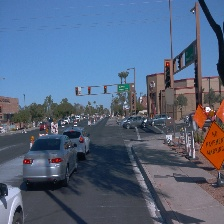

Input : (-0.9762823473712684, 0.5, -1.0, 0.5298121387834055, 0.5116836920025706, 0.5, -1.0, 0.5304072362040358, 0.5105197260914323, 0.5, -1.0, 0.5289951887380623, 0.5120218032143595, 0.043480137397392316, 0.6455721450851198, -0.10426812917836431, -0.4444008706195775, -0.024324645068498022, -0.014705738893724132, 0.0430944715108426, 0.6598099688043808, -0.11738888001271323, 0.10236595683040285, -1.6661812872749282, 0.4052690855555314) Output : (-0.0028123368364084576, -0.8636971588375958) IMG Path : /content/drive/My Drive/Waymo/training/training_0001/segment-10500357041547037089_1474_800_1494_800_with_camera_labels/segment-10500357041547037089_1474_800_1494_800_with_camera_labels.tfrecord--25.jpg IMG ACT : /content/training/training_0001/segment-10500357041547037089_1474_800_1494_800_with_camera_labels/segment-10500357041547037089_1474_800_1494_800_with_camera_labels.tfrecord--25.jpg


In [ ]:
# Set Up Train Dataset after scaling remaining columns

i = random.randint(0,len(train_set)-1)
pd.options.display.max_columns = 25

print(train_set.loc[[i]])

train_output = train_set[['accel_x' , 'accel_y']]
train_set = train_set.drop(['accel_x' , 'accel_y', 'accel_z'], axis = 1)

train_out = [] 
train_input = []
train_images_act = []
train_images_img = []

train_scaled_features = train_set.copy()

col_names = ['pose-timestamp','v_x','v_y','v_z','w_x','w_y','w_z','lag_vx','lag_vy','lag_vz', 'lag_accel_x', 'lag_accel_y', 'lag_accel_z'] # columns to scale
features = train_scaled_features[col_names]
scaler = StandardScaler().fit(features.values) # use this scaler for test and val as well
features = scaler.transform(features.values)
train_scaled_features[col_names] = features

for x in train_scaled_features.itertuples():
  train_input.append(x[2:27])
  train_images_img.append(x[27])
  train_images_act.append(x[27].replace('/content/drive/My Drive/Waymo/training/', '/content/training/'))

for x in train_output.itertuples():
  train_out.append(x[1:3])

print("Length of input, output, img_path, img_activations : ", len(train_input), len(train_out), len(train_images_act), len(train_images_img))

#SANITY CHECK

image_path = train_images_img[i]
display.display(display.Image(image_path))

print("Input : " + str(train_input[i]) + 
      " Output : " + str(train_out[i]) +
      " IMG Path : " + str(train_images_img[i]) +
      " IMG ACT : " + str(train_images_act[i]))


Length of input, output, img_path, img_activations :  10368 10368 10368 10368


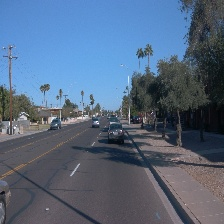

Input : (-0.9967333150321432, 0.0, -1.0, 0.6911364650973449, -1.0, 0.0, -1.0, 0.6914006368974529, -1.0, 0.0, -1.0, 0.6915368046659417, -1.0, 2.233483015584807, 0.00722873310799029, 0.20047084207191354, 0.5471438012953008, 0.0409705861330744, 0.016639036169681324, 2.2388428957526902, 0.009190073871296655, 0.13378142161466913, 0.022079336733376358, -0.02092317597676842, -0.31567438131579684) Output : (-0.043886982912972265, -0.12321876020703748) IMG Path : /content/drive/My Drive/Waymo/training/training_0008/segment-14561791273891593514_2558_030_2578_030_with_camera_labels/segment-14561791273891593514_2558_030_2578_030_with_camera_labels.tfrecord--59.jpg IMG ACT : /content/training/training_0008/segment-14561791273891593514_2558_030_2578_030_with_camera_labels/segment-14561791273891593514_2558_030_2578_030_with_camera_labels.tfrecord--59.jpg


In [ ]:
# Set Up VAL Dataset

val_output = val_set[['accel_x' , 'accel_y']]
val_set = val_set.drop(['accel_x' , 'accel_y', 'accel_z'], axis = 1)

val_out = []
val_input = []
val_images_act = []
val_images_img = []

val_scaled_features = val_set.copy()
features = val_scaled_features[col_names]
features = scaler.transform(features.values)
val_scaled_features[col_names] = features


for x in val_scaled_features.itertuples():
  val_input.append(x[2:27])
  val_images_img.append(x[27])
  val_images_act.append(x[27].replace('/content/drive/My Drive/Waymo/training/', '/content/training/'))

for x in val_output.itertuples():
  val_out.append(x[1:3])

print("Length of input, output, img_path, img_activations : ", len(val_input), len(val_out), len(val_images_act), len(val_images_img))

#SANITY CHECK

i = random.randint(0,len(val_input)-1)

image_path = val_images_img[i]
display.display(display.Image(image_path))

print("Input : " + str(val_input[i]) + 
      " Output : " + str(val_out[i]) +
      " IMG Path : " + str(val_images_img[i]) +
      " IMG ACT : " + str(val_images_act[i]))

Length of input, output, img_path, img_activations :  14621 14621 14621 14621


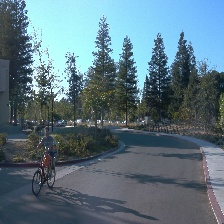

Input : (-1.0788263658181607, 0.5, 0.0, 0.30649429071290085, 0.314298251659836, 0.5, 0.0, 0.3055094249012469, 0.31230031263011937, 0.5, 0.0, 0.3072289307649476, 0.31331473237063445, 0.0498841074938008, -0.0038198501745526, 0.03312629619042305, 0.03870847661795234, 0.02222757797721648, -0.05111626414948831, 0.049477256502920244, -0.0036730672188801817, 0.033209932488132386, 0.009167282564779018, -0.023098486354736745, -0.001861504176816124) Output : (0.0, 0.0) IMG Path : /content/drive/My Drive/Waymo/training/training_0016/segment-1994338527906508494_3438_100_3458_100_with_camera_labels/segment-1994338527906508494_3438_100_3458_100_with_camera_labels.tfrecord--82.jpg IMG ACT : /content/training/training_0016/segment-1994338527906508494_3438_100_3458_100_with_camera_labels/segment-1994338527906508494_3438_100_3458_100_with_camera_labels.tfrecord--82.jpg


In [ ]:
# Set Up TEST Dataset

test_output = test_set[['accel_x' , 'accel_y']]
test_set = test_set.drop(['accel_x' , 'accel_y', 'accel_z'], axis = 1)

test_out = []
test_input = []
test_images_act = []
test_images_img = []

test_scaled_features = test_set.copy()
features = test_scaled_features[col_names]
features = scaler.transform(features.values)
test_scaled_features[col_names] = features


for x in test_scaled_features.itertuples():
  test_input.append(x[2:27])
  test_images_img.append(x[27])
  test_images_act.append(x[27].replace('/content/drive/My Drive/Waymo/training/', '/content/training/'))

for x in test_output.itertuples():
  test_out.append(x[1:3])

print("Length of input, output, img_path, img_activations : ", len(test_input), len(test_out), len(test_images_act), len(test_images_img))

#SANITY CHECK

i = random.randint(0,len(test_input)-1)

image_path = test_images_img[i]
display.display(display.Image(image_path))

print("Input : " + str(test_input[i]) + 
      " Output : " + str(test_out[i]) +
      " IMG Path : " + str(test_images_img[i]) +
      " IMG ACT : " + str(test_images_act[i]))

In [ ]:
# training generator ( return feature input and output) 
batch_size= 32
def training_generator(batch_size=64):
  train_i = []
  train_o = []
  train_img = []
  while True:
    for j in range(len(train_input)):
      train_i.append(train_input[j])
      train_o.append(train_out[j])
      if len(train_i) % batch_size == 0:
        features = np.array(train_i).shape[-1]
        #print(np.array(train_i).reshape(batch_size,1,features).shape, np.array(train_o).shape)
        yield((np.array(train_i).reshape(batch_size,1,features), np.array(train_o)))
        train_i = []
        train_o = []
        train_img = []

train_gen = training_generator(batch_size=batch_size)

In [ ]:
# validation generator
def validation_generator(batch_size=64):
  val_i = []
  val_o = []
  while True:
    for j in range(len(val_input)):
      val_i.append(val_input[j])
      val_o.append(val_out[j])
      if len(val_i) % batch_size == 0:
        features = np.array(val_i).shape[-1]
        #print(np.array(train_i).reshape(batch_size,1,22).shape, np.array(train_o).shape)
        yield((np.array(val_i).reshape(batch_size,1,features), np.array(val_o)))
        val_i = []
        val_o = []

val_gen = validation_generator(batch_size=batch_size)

In [ ]:
# test generator 
def test_generator(batch_size=64):
  test_i = []
  test_o = []
  while True:
    for j in range(len(test_input)):
      test_i.append(test_input[j])
      test_o.append(test_out[j])
      if len(test_i) % batch_size == 0:
        features = np.array(test_i).shape[-1]
        #print(np.array(train_i).reshape(1,batch_size,22).shape, np.array(train_o).shape)
        yield((np.array(test_i).reshape(batch_size,1,features), np.array(test_o)))
        test_i = []
        test_o = []

test_gen = test_generator(batch_size=batch_size)

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, Flatten, Input, LSTM, Dropout, Bidirectional
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import optimizers

batch_size = 32

model = Sequential()
model.add(LSTM(256, return_sequences= False))
model.add(Dropout(0.2))
model.add(Dense(2))

opt = optimizers.Adam()

model.compile(loss='mean_absolute_error',
              optimizer=opt,
              metrics=['accuracy'])


from tensorflow.keras.callbacks import TensorBoard
epochs = 60
batch_size = 32
steps_train =len(train_input)//batch_size
steps_val =  len(val_input)//batch_size
LOG_DIR = '/content/'

tbCallBack = TensorBoard(log_dir=LOG_DIR, 
                         histogram_freq=1,
                         write_graph=True,
                         write_images=True)


history = model.fit(train_gen, epochs=epochs, steps_per_epoch=steps_train, verbose=1, validation_data=val_gen, validation_steps=steps_val)


Epoch 1/60
1295/1295 [==============================] - 7s 5ms/step - loss: 0.2071 - accuracy: 0.7483 - val_loss: 0.1969 - val_accuracy: 0.8087
Epoch 2/60
1295/1295 [==============================] - 7s 5ms/step - loss: 0.1784 - accuracy: 0.7702 - val_loss: 0.1877 - val_accuracy: 0.6699
Epoch 3/60
1295/1295 [==============================] - 7s 5ms/step - loss: 0.1754 - accuracy: 0.7611 - val_loss: 0.1887 - val_accuracy: 0.7689
Epoch 4/60
1295/1295 [==============================] - 7s 5ms/step - loss: 0.1741 - accuracy: 0.7665 - val_loss: 0.1785 - val_accuracy: 0.6845
Epoch 5/60
1295/1295 [==============================] - 7s 5ms/step - loss: 0.1708 - accuracy: 0.7628 - val_loss: 0.1850 - val_accuracy: 0.6660
Epoch 6/60
1295/1295 [==============================] - 7s 5ms/step - loss: 0.1691 - accuracy: 0.7689 - val_loss: 0.1795 - val_accuracy: 0.6879
Epoch 7/60
1295/1295 [==============================] - 7s 5ms/step - loss: 0.1669 - accuracy: 0.7719 - val_loss: 0.1770 - val_accuracy:

In [ ]:
# test generator 
def test_generator(batch_size=64):
  test_i = []
  test_o = []
  while True:
    for j in range(len(test_input)):
      test_i.append(test_input[j])
      test_o.append(test_out[j])
      if len(test_i) % batch_size == 0:
        features = np.array(test_i).shape[-1]
        #print(np.array(train_i).reshape(1,batch_size,22).shape, np.array(train_o).shape)
        yield((np.array(test_i).reshape(batch_size,1,features), np.array(test_o)))
        test_i = []
        test_o = []

test_gen = test_generator(batch_size=batch_size)

In [ ]:
steps = len(test_input)//batch_size + 1
prediction = model.predict(test_gen, steps = steps, verbose=1)

MAE_x = np.mean(abs(prediction[:14621,0] - np.array(test_out)[:,0]))
MAE_y = np.mean(abs(prediction[:14621,1] - np.array(test_out)[:,1]))

print(MAE_x)
print(MAE_y)

457/457 [==============================] - 1s 2ms/step
0.14368047629416525
0.14782253345526203


In [ ]:
steps = len(test_input)//batch_size
score = model.evaluate(test_gen, steps = steps, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


456/456 [==============================] - 1s 3ms/step - loss: 0.1458 - accuracy: 0.7808
Test loss: 0.14577530324459076
Test accuracy: 0.7808387875556946
